
## White Wine Quality dataset

In this notebook we will explore the White wine quality dataset, this has 12 columns (11 input features and 1 target variable)
We will approach this dataset as a classification task.

**Name:** Arun Prasadh K



## Task 1: Data Presentation and Description

In [1]:

# Read the data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
white_wine = pd.read_csv(r'Wine_Quality_dataset.csv')
cols = white_wine.drop(['quality'], axis=1).columns
white_wine.info()
white_wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4385 non-null   float64
 1   volatile acidity      4385 non-null   float64
 2   citric acid           4385 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4385.000000,4385.000000,4385.000000,4896.00000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.847149,0.278704,0.333047,6.39133,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.836733,0.100623,0.121342,5.07284,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.60000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.70000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.20000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.90000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.80000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Data Description:**

As seen from the info() and describe() functions, we have a significant number of missing data in the first 3 columns. The columns 'fixed acidity', 'volatile acidity' and 'citric acid' each have 513 missing values, this amounts to 10% of missing data. Our dataset is also not free of outliers, especially the columns 'residual sugar','free sulfur dioxide' and 'total sulfur dioxide'. The other columns do have outliers but they are not as comparable to the above 3 columns.

**Data Distribution:**
As seen from the histogram below and the description above, we can infer the distribution of the data among multiple features. Most wines have **fixed acidity** between 5.5(g/dm^3) - 7.5(g/dm^3). In terms of **volatile acidity**, majority of the data lies between 0.1 and 0.4. The **citric acid** has most of the data in the 0.3 range. Most wines have **residual sugar** at 2(g/dm^3) and has a max outlier at 65.8. Most wines have **chlorides** at 0.03(g/dm^3) - 0.06(g/dm^3) and there are some outliers. **pH** looks to have a normal distribution of data **alcohol** has a pretty average distribution across the value range and most of it is around 9.5%. **density** is concentrated in the range of 0.99 to 1.00. **free sulfur dioxide** has a wide distribution from 0 to 100 and some significant outlier value of 289. **total sulfur dioxide** is distributed in the range of 40 to 200, with significant outlier values upto 440 and **sulphates** are significantly concentrated at 0.4(g/dm^3) and 0.5(g/dm^3).
**quality** is our target variable and 5,6,7 are the most prominent values and is imbalanced.

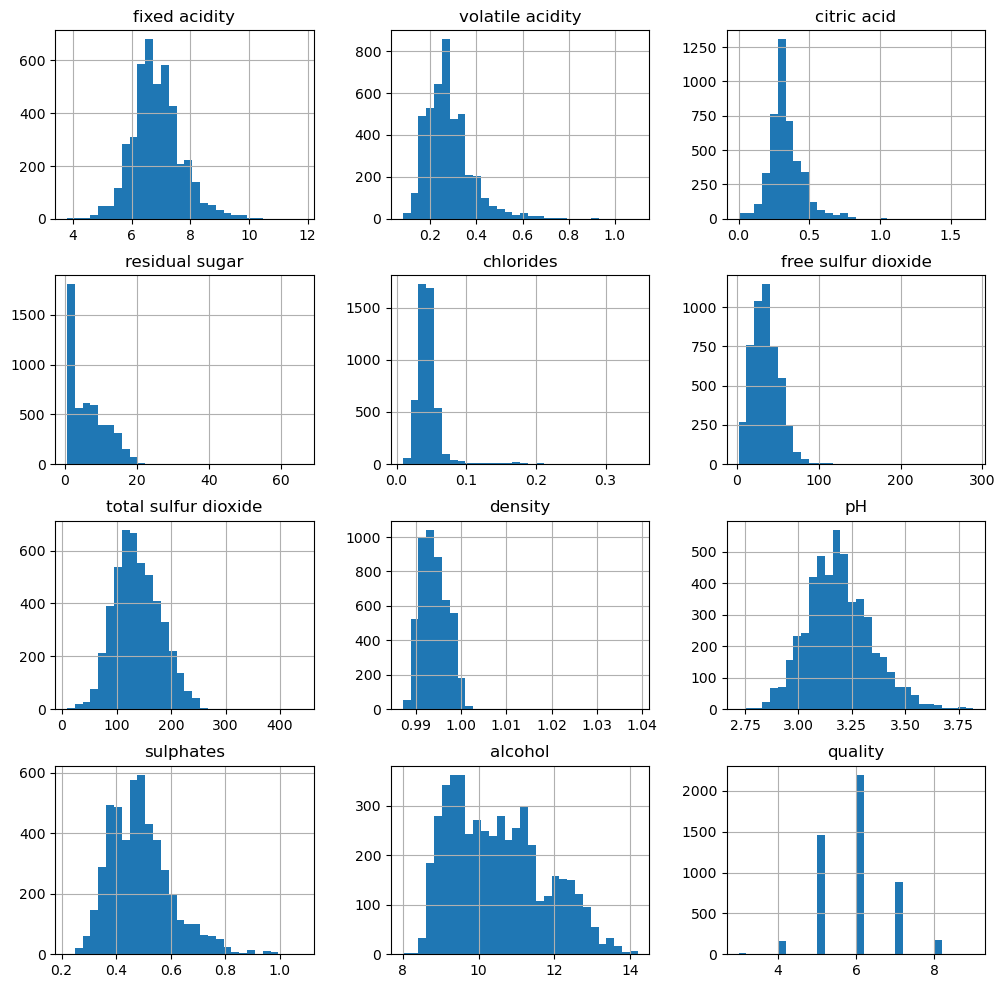

In [2]:
white_wine.hist(figsize= (12,12),bins = 30)

plt.show()

Also here we will see the correlation of input features to the target variable using Spearman correlation. This shows how much the **alcohol** feature is correlated to the target variable.

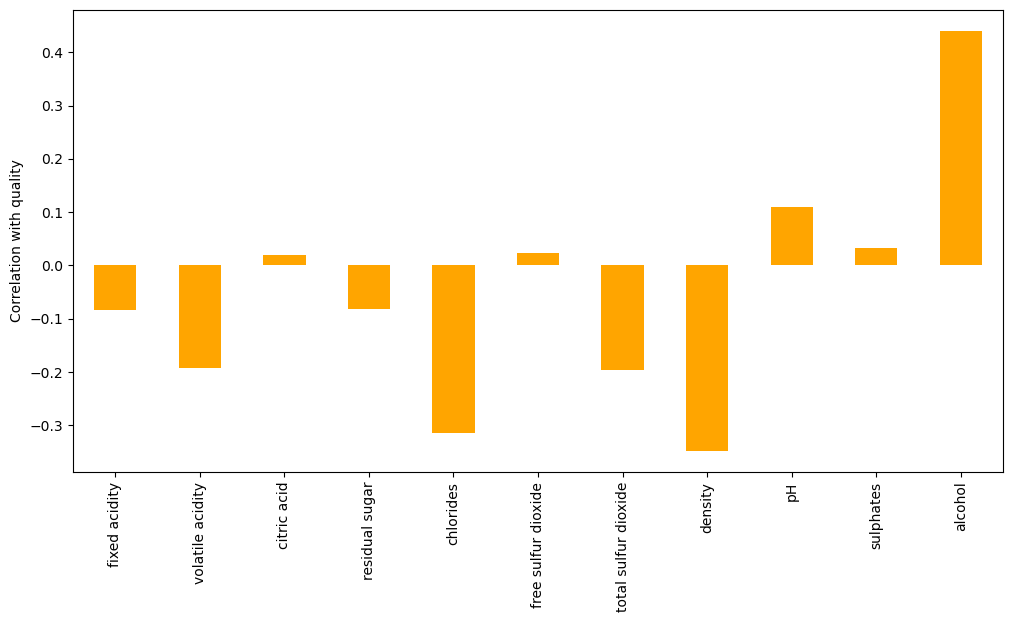

In [3]:
corr_matrix = white_wine.corr(method='spearman')
corr_matrix['quality'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with quality")
plt.show()

As seen from the first cell, we have quite a few missing data. Let us handle them by dropping the rows with missing data.
The data frame **clean_df** contains only those rows, which do not have any missing data (NaN values)

In [4]:
# Handle missing data
# make a copy of the original dataset, containing only the rows with missing values
df_copy = white_wine[white_wine.isna().any(axis=1)].copy()
df_copy.info()
# We drop the rows with the missing data
clean_df = white_wine.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 8 to 4804
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         0 non-null      float64
 1   volatile acidity      0 non-null      float64
 2   citric acid           0 non-null      float64
 3   residual sugar        511 non-null    float64
 4   chlorides             513 non-null    float64
 5   free sulfur dioxide   513 non-null    float64
 6   total sulfur dioxide  513 non-null    float64
 7   density               513 non-null    float64
 8   pH                    513 non-null    float64
 9   sulphates             513 non-null    float64
 10  alcohol               513 non-null    float64
 11  quality               513 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 52.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-

## Handling outliers

As described earlier there are significant outliers in our dataset, especially the columns 'residual sugar','free sulfur dioxide' and 'total sulfur dioxide' as seen in the below plot

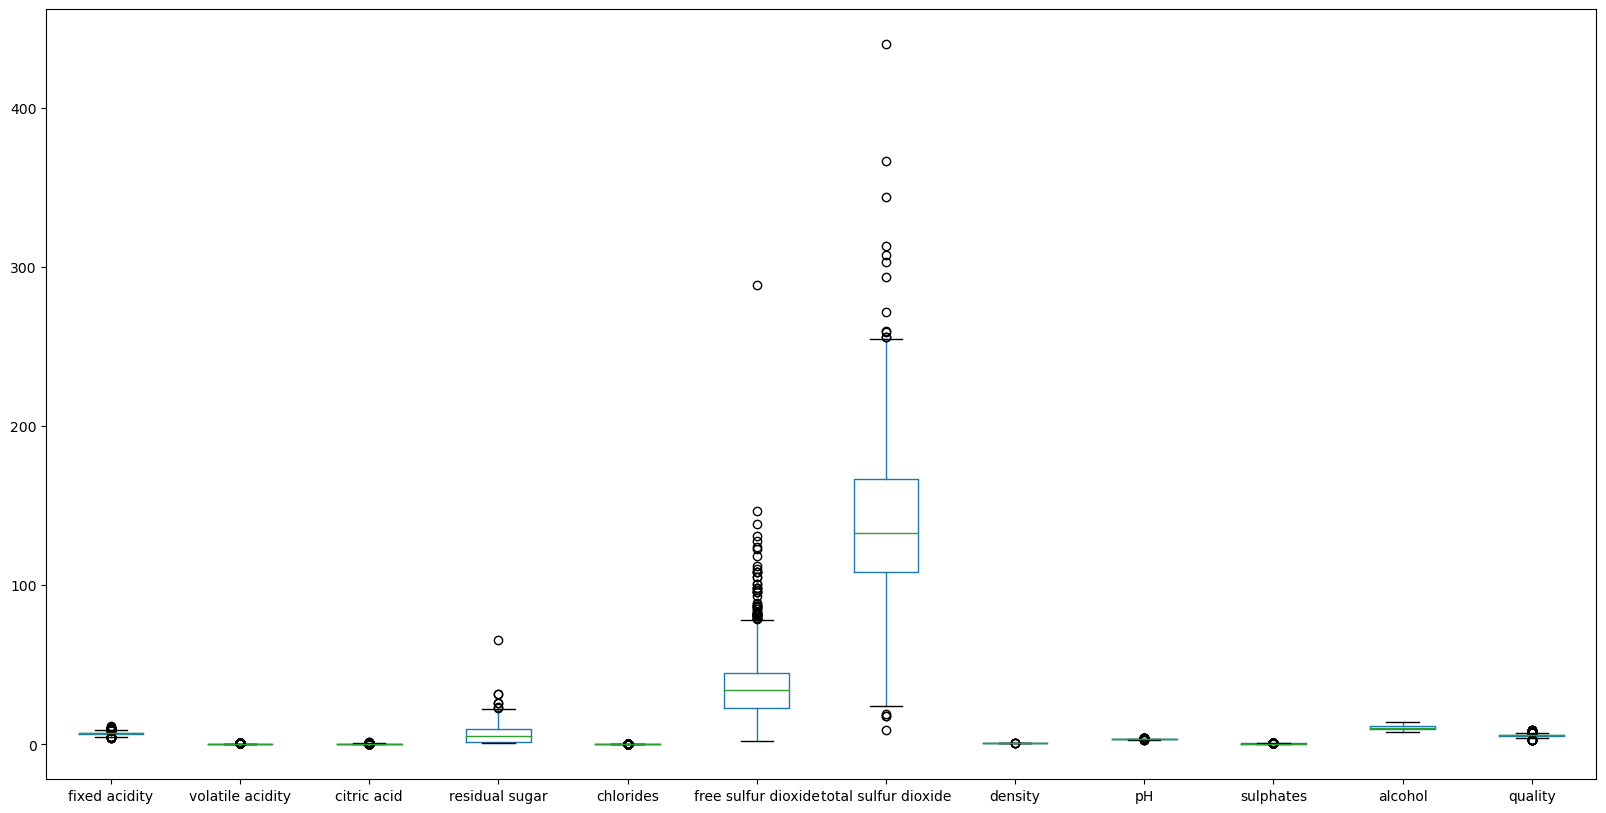

In [5]:
# Outliers
fig = plt.figure(figsize = (20,10))
clean_df.boxplot(column=[name for name in list(clean_df)], grid=False)
plt.show()

To handle outliers, we will use the Interquartile range approach. Here we consider 1st and 3rd quartile.
Any value on the range above (Q3 + 1.5 * IQR) and below Q1 - 1.5 * IQR will be considered an outlier.
We print the IQR value of each feature and finally the dataframe with outliers removed

In [6]:
Q1 = clean_df.quantile(0.25)
Q3 = clean_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((clean_df < (Q1 - 1.5 * IQR)) |(clean_df > (Q3 + 1.5 * IQR)))

fixed acidity            1.0000
volatile acidity         0.1100
citric acid              0.1200
residual sugar           8.2000
chlorides                0.0140
free sulfur dioxide     22.0000
total sulfur dioxide    59.0000
density                  0.0044
pH                       0.2000
sulphates                0.1400
alcohol                  1.9000
quality                  1.0000
dtype: float64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
4893          False             Fa

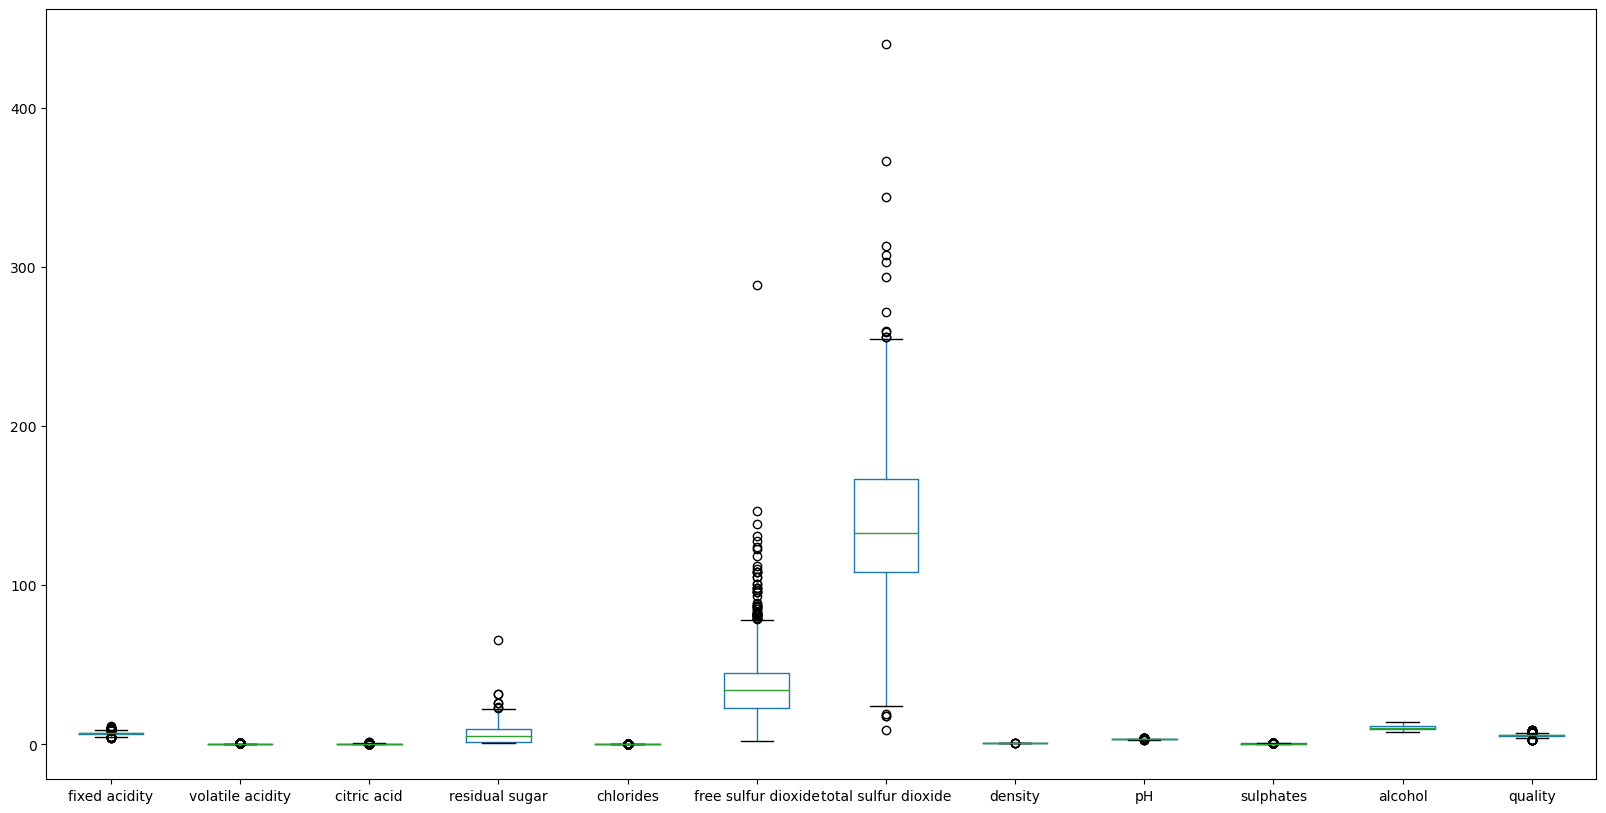

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000
mean,6.847149,0.278704,0.333047,6.448552,0.045544,35.278221,138.015849,0.994019,3.186456,0.491001,10.529228,5.876625
std,0.836733,0.100623,0.121342,5.110898,0.020776,17.038131,42.322146,0.003013,0.150688,0.114113,1.232571,0.887136
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,108.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,133.000000,0.993700,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.301000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
# outliers will contain only those in the range of 0.25 to .75
Final_df = clean_df[~((clean_df < (Q1 - 1.5 * IQR)) |(clean_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#The below plot show the distribution with the outliers 
fig = plt.figure(figsize = (20,10))
clean_df.boxplot(column=[name for name in list(clean_df)], grid=False)
plt.show()
clean_df.describe()

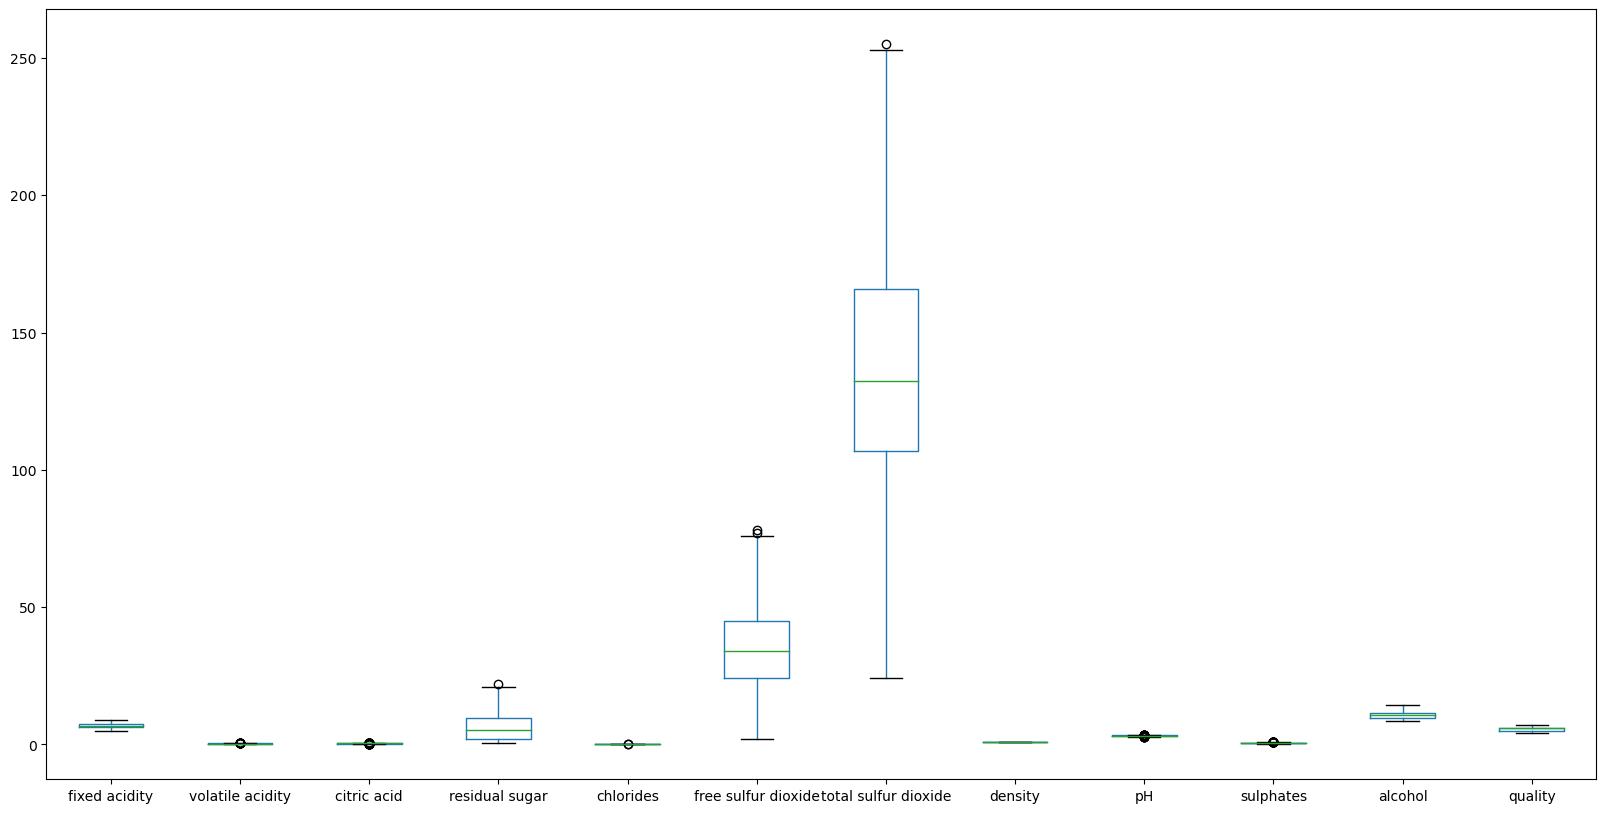

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,6.805846,0.265012,0.321928,6.421074,0.042433,34.702800,137.122835,0.993890,3.184558,0.482760,10.564857,5.870092
std,0.736503,0.076265,0.086868,4.961251,0.009842,14.964968,41.205849,0.002885,0.137973,0.097873,1.194141,0.756442
min,4.800000,0.080000,0.090000,0.600000,0.015000,2.000000,24.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,132.500000,0.993600,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.700000,0.049000,45.000000,166.000000,0.995900,3.270000,0.540000,11.400000,6.000000
max,8.800000,0.485000,0.560000,22.000000,0.071000,78.000000,255.000000,1.001960,3.570000,0.760000,14.200000,7.000000


In [8]:
# In the below figure we show the data distribution with the outliers removed
fig = plt.figure(figsize = (20,10))
Final_df.boxplot(column=[name for name in list(Final_df)], grid=False)
plt.show()
Final_df.describe()


As seen in the above two plots, by using IQR (1,3), we have significantly handled the outliers. Thus removing missing data and outliers from our dataset. The dataset **Final_df** is devoid of missing data and outliers

## Task 2: Data Scaling

Here we visualize the effects of data scalers on our input features using boxplot. The scalers used are MinMaxScaler, MaxAbsScaler, RobustScaler.

We use **MinMaxScaler** as it redistributes the data to a smaller scale, in this case (0 to 1) as seen below, also as we have removed/handled outliers and missing data, this scaler is more suitable

**MaxAbsScaler** it is considered as it does not change the distribution shape and also it works better as we have handled the outliers before hand

**RobustScaler** it is more inline with our interquartile approach of scaling and also it can handle existing outliers. This scaler is used in case if there are outliers existing in the data.

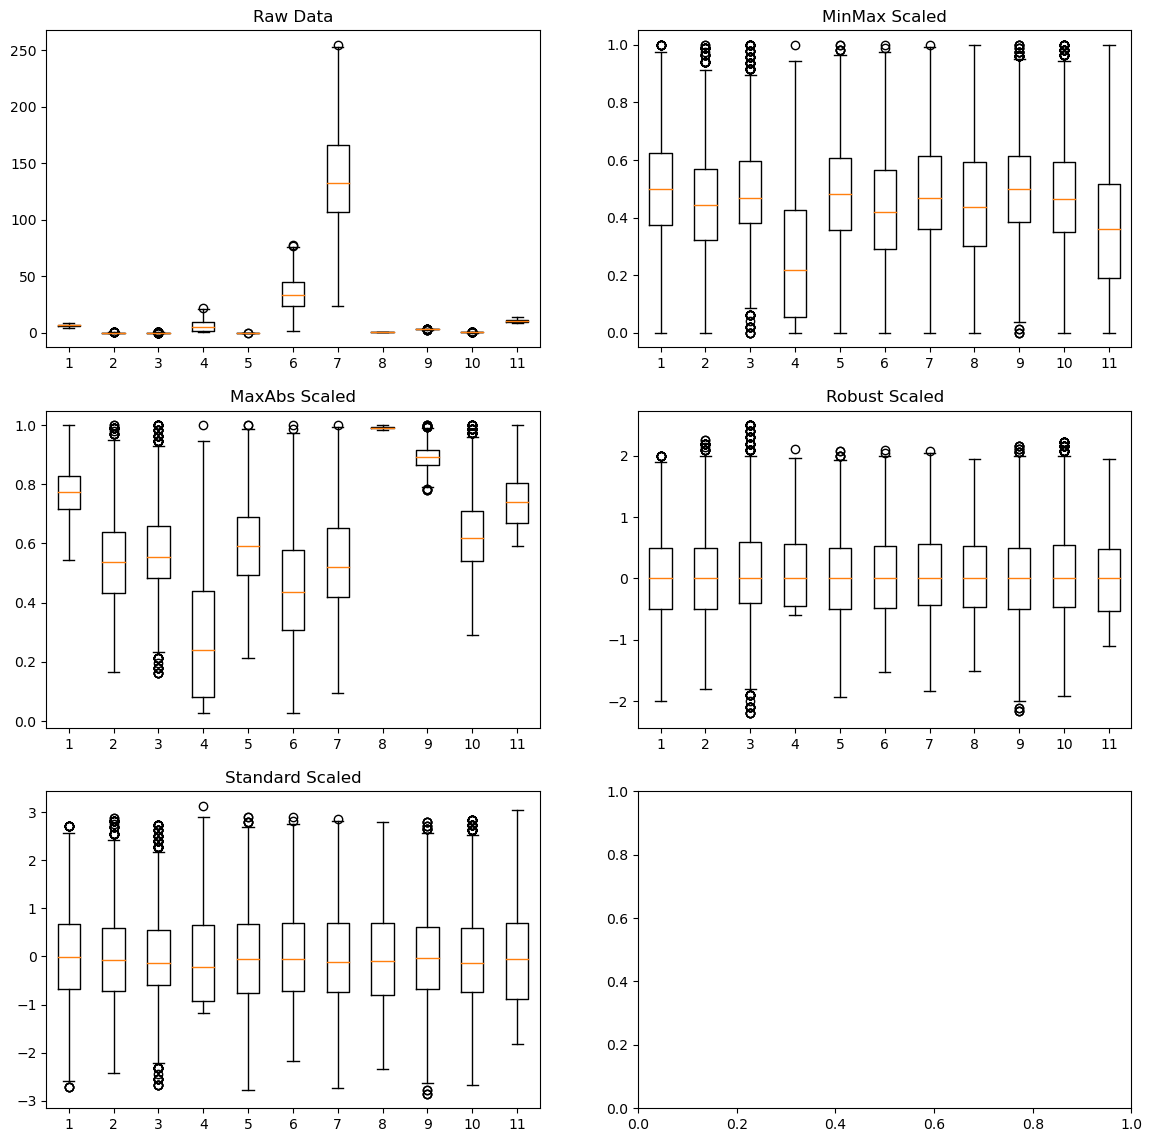

In [9]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler,StandardScaler
x_train = Final_df.iloc[:,:-1]
mms = MinMaxScaler()
mas = MaxAbsScaler()
rs = RobustScaler()
ss = StandardScaler()

# We fit and transform the cleansed data using each scaler and convert it to a data frame
min_scaled = mms.fit_transform(x_train)
min_scaled = pd.DataFrame(min_scaled)

max_scaled = mas.fit_transform(x_train)
max_scaled = pd.DataFrame(max_scaled)

r_scaled = rs.fit_transform(x_train)
r_scaled = pd.DataFrame(r_scaled)

s_scaled = ss.fit_transform(x_train)
s_scaled = pd.DataFrame(s_scaled)

# Once they are scaled we plot boxplots to visualize the distribution
fig,axs = plt.subplots(3,2,figsize = (14,14))

axs[0][0].boxplot(x_train)
axs[0][0].set_title('Raw Data')

axs[0][1].boxplot(min_scaled)
axs[0][1].set_title('MinMax Scaled')

axs[1][0].boxplot(max_scaled)
axs[1][0].set_title('MaxAbs Scaled')

axs[1][1].boxplot(r_scaled)
axs[1][1].set_title('Robust Scaled')

axs[2][0].boxplot(s_scaled)
axs[2][0].set_title('Standard Scaled')

plt.show()


As we have used multiple scaling methods, from the above plot we can see how the data distribution has been scaled compared to the original data. The **raw data** has a highly varying distribution, whereas each of these scalers have contributed to reducing our expanse of data. The **Robust scaler** and **Standard scaler** have both scaled the data in the range of (-2 to +2) and (-3 to +3) respectively. On the other hand **MinMax Scaler** and **MaxAbs scaler** have both scaled the data in the range of (0 to 1). From the plot we can see that standard scaler and robust scaler have distributed the features equally, whereas minmax and maxabs have varying distribution. From here on we will consider **MinMax Scaler, MaxAbs Scaler and Robust Scaler** for further processing

## Task 3: Handling missing data and outliers

In order to do the missing data and outlier handling, we will make use of our original data frame **White_Wine**.
Here to handle missing data we will consdier using ffill(forward filling).

And to handle outliers we will make use of the interquartile range, as it will not extrapolate our outliers.

Here we will follow the methods learnt as part of the course.

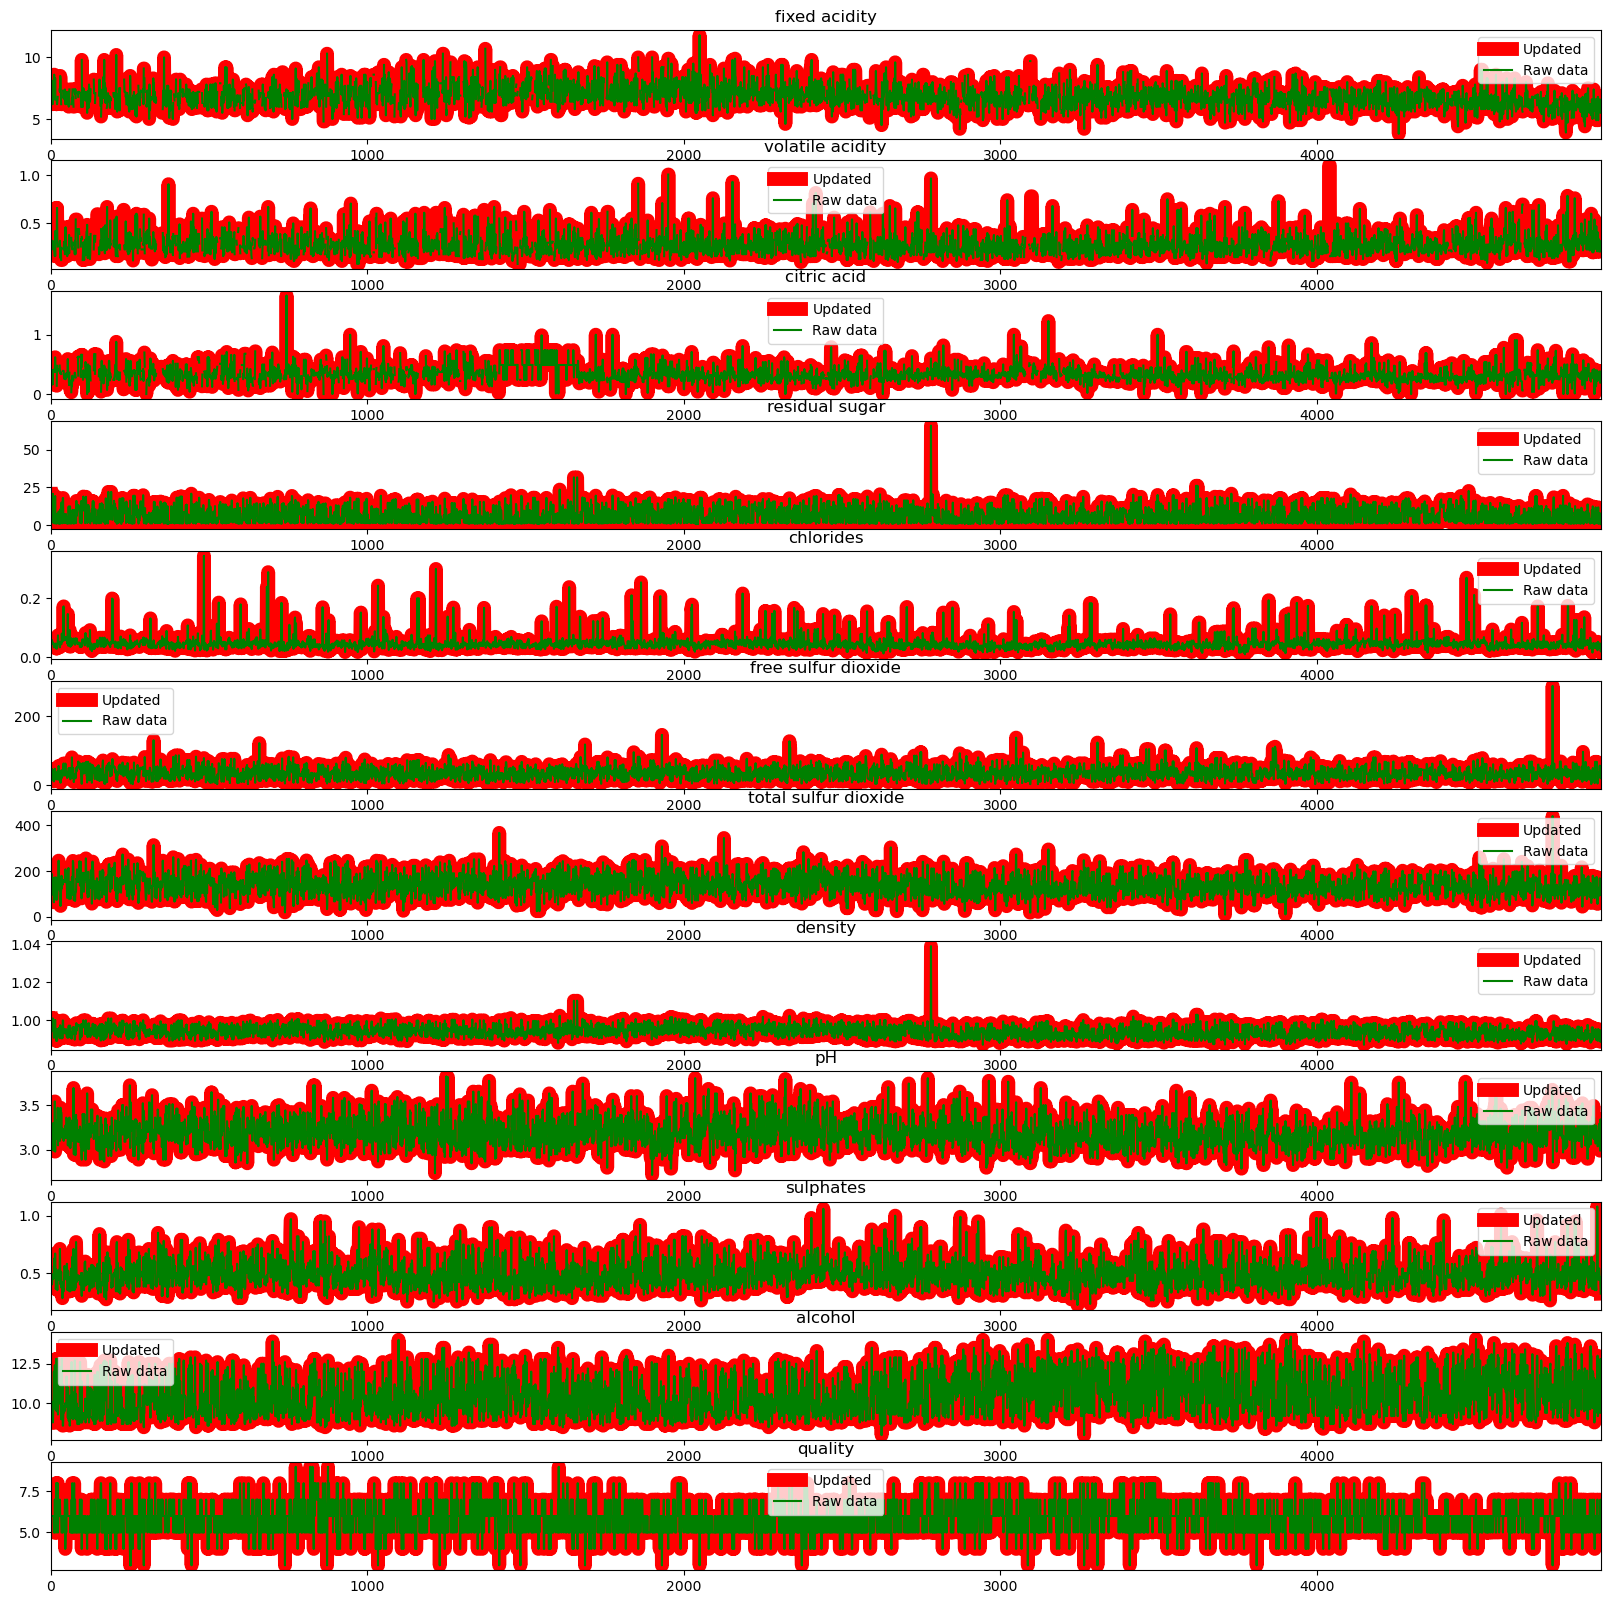

In [10]:
# we will define a custom method to plot the distribution of Raw data vs Updated data
def plot_distribution(raw_data, result, columns):
# we plot each feature in a row    
    fig, axs = plt.subplots(len(columns),1,figsize=(20,20))
    axs = axs.flatten()
# consider the min and max valued index of the raw data    
    lim = (raw_data.index.min(), raw_data.index.max())
    i = 0
# for each feature we plot the original and updated data
    for c in columns:
        result[c].plot(ax=axs[i], title=c, xlabel='', xlim=lim, label='Updated', lw=10, color='red')
        raw_data[c].plot(ax=axs[i], title=c, xlabel='', xlim=lim, label='Raw data', color='green')
        axs[i].legend()
        i+=1
# column names        
column = ["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide",
          "total sulfur dioxide", "density", "pH","sulphates", "alcohol", "quality"]   

# make a copy of the raw dataset
fill_df = white_wine.copy()

# apply ffill (This fills subsequent missing/NaN values with the previous data )
fill_df = white_wine.fillna(method='ffill')

# Call the plot function with raw data, updated data and column names
plot_distribution(white_wine, fill_df, column)

As seen from the above plot, we can see that the updated data set has more distribution in terms of values. The issue with us using bfill or ffill to handle the missing data is that, it will not provide the true picture of the data distribution and will hinder our classification task.

Handling outlier using IQR, here we obtain the 1st and 3rd quantile and calculate the upper and lower bound. Once done, we assign them to those outside the range respectively

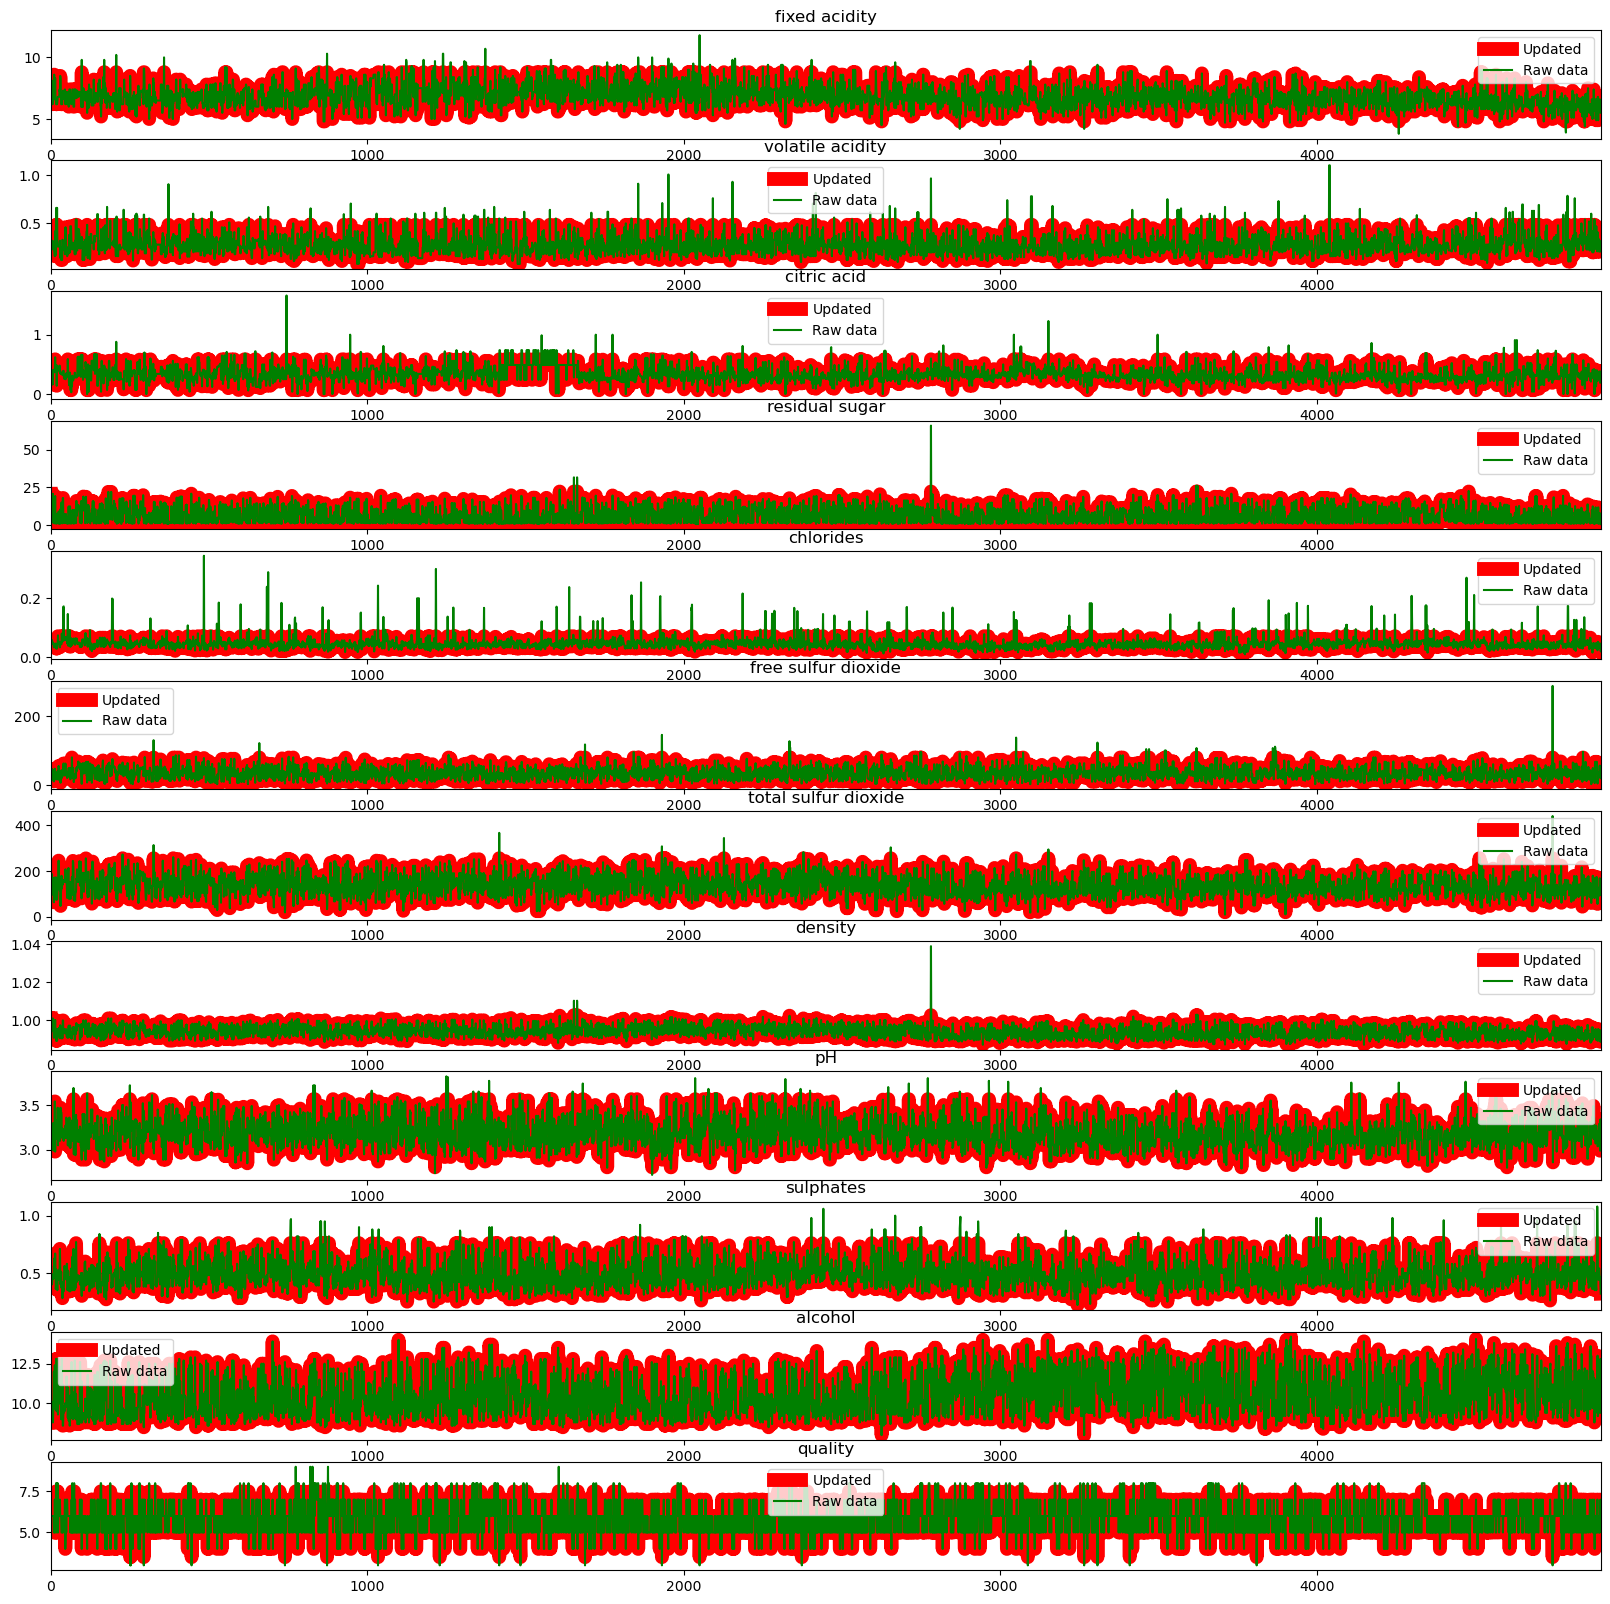

In [11]:
# Define a custom method to calculate the upper and lower bounds based on the updated dataset
def upd_outliers(df, column):
    for c in column:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
# if less than low update with low, else if higher than high update with high        
        df[c] = np.where(df[c] >= high, high, np.where(df[c] <= low, low, df[c]))

# We use the dataset with the missing values updated earlier    
upd_df = fill_df.copy()        
upd_outliers(upd_df, column)
# call the method to update the dataset with the outliers
plot_distribution(fill_df, upd_df, column)

From the above plot we can observe that out IQR approach to handle outliers has helped in controlling the extremeties.
For example in **free sulfur dioxide** plot the updated data is much less skewed than the original data.

**Classification Task**

Here we will make use of **Random Forest classifier and KNN Classifer**, as they provided the best performance among other methods exectued (SGD and SVC). Also we will make use of **f1_weighted** as the metric of choice, in our case the target variable (**quality**) is imbalanced in nature. This can be seen by the histogram plotted to visualize the data distribution, in such a scenario **f1_weighted** will provide a model that is more reliable and not overfitting.

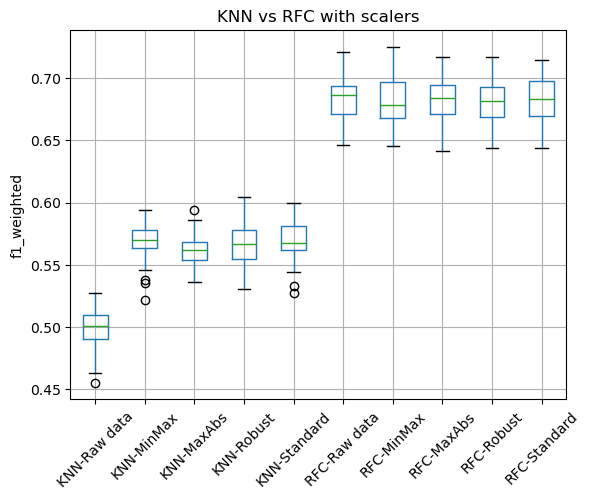

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# In this task we evaluate multiple scalers on a KNN and RF Classifier on the cleansed data
# Define scaler names as required for the models
KNN_scalers = ['KNN-MinMax', 'KNN-MaxAbs', 'KNN-Robust', 'KNN-Standard']
RFC_scalers = ['RFC-MinMax',  'RFC-MaxAbs', 'RFC-Robust','RFC-Standard']

# Build an array with the necessary data scalers
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler() ,StandardScaler()]

# List for the final scores
results = {}

# Define KNN  with best neighbor value as 3
KNN = KNeighborsClassifier(n_neighbors=3)

# Define Random forest classifier 
RFC = RandomForestClassifier() 

# update the target variable to the required type, in order to use in cross validation
upd_df = upd_df.astype({'quality': 'int64'})

# Define Input and target data from the preprocessed dataset
X = upd_df.iloc[:,:-1]
Y = upd_df.iloc[:,-1]


# Define cross validation with 5 folds and 10 repetitions
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state = 5)


#Perform KNN without data scaling
scores = cross_val_score(KNN, X, Y, scoring='f1_weighted', cv=cv, n_jobs=-1)
# append the result
results['KNN-Raw data'] = scores

# Perform KNN with all data scaling methods
for i in range (len(scalers)):
    X_t = scalers[i].fit_transform(X)
    scores = cross_val_score(KNN, X_t, Y, scoring='f1_weighted', cv=cv, n_jobs=-1) 
#     append the result of each scaler on the data
    results[KNN_scalers[i]] = scores

# Perform RF classification without data scaling
RFC_scores = cross_val_score(RFC, X, Y, scoring='f1_weighted',cv =cv, n_jobs=-1)
# append the result
results['RFC-Raw data'] = RFC_scores

# Perform RF classification with all data scaling methods
for i in range (len(scalers)):
    X_tr = scalers[i].fit_transform(X)   
    RFC_scores = cross_val_score(RFC, X_tr, Y, scoring='f1_weighted',cv= cv, n_jobs=-1)    
#     append the result of each scaler on the data
    results[RFC_scalers[i]] = RFC_scores
    

# # Convert the list to a dataframe
df_res = pd.DataFrame(results)

# # perform boxplot function on the data frame, with a rotated label on X-axis
boxplot = df_res.boxplot(rot = 45) 

# # Set the y-axis label as f1_weighted
boxplot.set_ylabel('f1_weighted')

# # Call plot show() function to display the f1 score of all the scalers and classifers combination
plt.title('KNN vs RFC with scalers')
plt.show()


# scaled_df = mms.fit_transform(X)

From the above figure we can see that Random Forest classifier returns a better score, but there is no improvement achieved by scaling the data. In terms of using KNN classifer with 3 neighbors, we can see that there is significant improvement in performance especially by using MinMaXScaler and StandardScaler. For further steps we will make use of either RFC with MinMaxScaler or KNN with MinMaxScaler.

As seen from the above plot, we will consider scaling our cleansed data using the MinMax Scaler. Thus we can see that our data has been filled and is void of missing data and outliers

In [13]:
# We scale our cleansed data (only the input features) using MinMaxScaler
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled , columns = cols)

print("Sum of missing data:")
print(X_scaled.isna().sum())
X_scaled

Sum of missing data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.550,0.469136,0.567308,0.930556,0.535714,0.547771,0.637712,0.892889,0.256579,0.425926,0.129032
1,0.375,0.543210,0.528846,0.046296,0.607143,0.152866,0.476695,0.442909,0.651316,0.500000,0.241935
2,0.825,0.493827,0.644231,0.291667,0.625000,0.356688,0.328390,0.513620,0.598684,0.407407,0.338710
3,0.600,0.370370,0.490385,0.365741,0.767857,0.573248,0.705508,0.545761,0.506579,0.333333,0.306452
4,0.600,0.370370,0.490385,0.365741,0.767857,0.573248,0.705508,0.545761,0.506579,0.333333,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.350,0.320988,0.432692,0.046296,0.428571,0.280255,0.307203,0.259060,0.611842,0.518519,0.516129
4894,0.450,0.592593,0.567308,0.342593,0.571429,0.700637,0.629237,0.500763,0.453947,0.444444,0.258065
4895,0.425,0.395062,0.240385,0.027778,0.464286,0.356688,0.387712,0.349056,0.243421,0.444444,0.225806
4896,0.175,0.518519,0.451923,0.023148,0.125000,0.229299,0.383475,0.101567,0.703947,0.296296,0.774194


In [14]:
# Using description we can see that our data is devoid of any extreme outliers
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.510614,0.478933,0.511264,0.267383,0.509107,0.421679,0.503107,0.443984,0.502768,0.495871,0.405527
std,0.199602,0.215212,0.205154,0.230713,0.201690,0.203924,0.177793,0.187065,0.193683,0.199334,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.320988,0.375000,0.050926,0.375000,0.267516,0.375000,0.296505,0.375000,0.351852,0.241935
50%,0.500000,0.444444,0.490385,0.212963,0.500000,0.407643,0.485169,0.426195,0.493421,0.462963,0.387097
75%,0.625000,0.592593,0.625000,0.430556,0.625000,0.560510,0.625000,0.577903,0.625000,0.611111,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Task 4 : Feature Selection

As defined at the start of our project, we consider the **quality** column as our target variable. 
Also we will make use of the forward and backward selection under the Wrapper approach of feature selection. We have chosen this approach, as it is robust and allows for using a range of learning algorithms. This will help us in determining the best approach to successfully complete our classification task.

Here we will plot how each feature ranks with respect to our target variable using chi2 and ANOVA

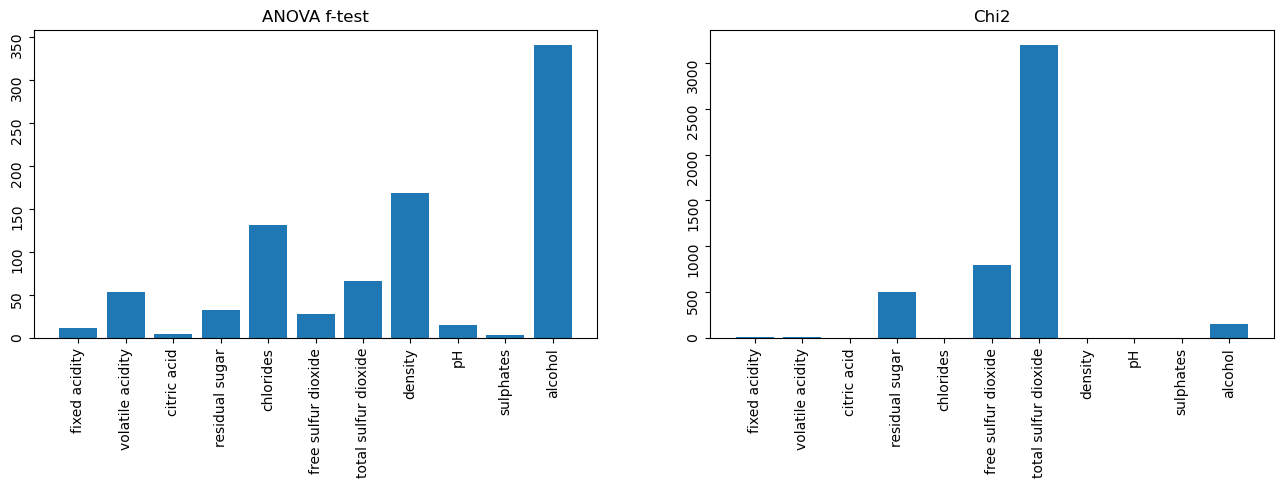

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif,chi2


# feature selection
def select_features(X, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all')
    # learn relationship from training data
    sel.fit(X, y)
    return sel
 
# feature selection with f_classif scoring
fs = select_features(X, Y, f_classif)
# feature selection with chi2 scoring
mi = select_features(X, Y, chi2)

# plot the scores
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs = axs.flatten()
# Display bar graph
axs[0].bar(cols, fs.scores_)
axs[0].tick_params(labelrotation=90)
axs[0].set_title('ANOVA f-test')
axs[1].bar(cols, mi.scores_)
axs[1].tick_params(labelrotation=90)
axs[1].set_title('Chi2')

plt.show()

As seen from the plot both ANOVA and chi2 scoring functions rate these features alcohol, chlorides and density as important features. 

We will make use of the Random Forest classifier to perform feature selection. Here we will use RFECV (Recursive Feature Elimination cross validation) and a normal Random forest classifier with repeatedkfold. We are using RFECV because it is easy to configure and use and because it is effective in selecting the attributes from the training dataset that are more relevant in predicting the target variable

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Initialise the cv scores 
RFE_scores = {}
RFC_cv = {}

# perform repated cv on the scaled data using RFC
RFC_cv = cross_val_score(RFC, X_scaled, Y, scoring='f1_weighted',cv= cv, n_jobs=-1) 


# Perfomr RFECV for RFC
rfecv = RFECV(estimator=RFC, step=1, cv=cv,scoring='f1_weighted')   #repeated k fold
# fit using scaled input
rfecv = rfecv.fit(X_scaled, Y)
# obtain the cv scores
RFE_scores = pd.DataFrame(rfecv.cv_results_ )
print('Optimal number of features for RF Classifier :', rfecv.n_features_)
print('Best features :',X_scaled.columns[rfecv.support_])
# drop std
RFE_scores = RFE_scores.drop(['std_test_score'],axis=1)

# Build sub plots for RFC CV scores with  RFE and with out RFE
fig, axs = plt.subplots(1, 2, figsize=(10,6))

df_rfe = pd.DataFrame(RFE_scores['mean_test_score']).copy()
df_wrfe = pd.DataFrame(RFC_cv).copy()
# Provide necessary params for the mean scores
axs[0].boxplot(df_rfe)
axs[1].boxplot(df_wrfe)

# Set labels and titles
axs[0].set_xlabel("Number of Features Selected")
axs[0].set_ylabel("f1 score")
axs[0].set_title("RF Classifier with RFE")

# Set labels and titles
axs[1].set_xlabel("Number of Features Selected")
axs[1].set_ylabel("f1 score")
axs[1].set_title("RF Classifier without RFE - baseline")


plt.show()

KeyboardInterrupt: 

As observed here, there is no improvement in performance by using RFECV. in fact the baseline model performs better in our case. This lets us conclude that not all dataset will improve by using a feature selection method, in our case once the data was scaled the distribution in correlation became distributed and it has improved the data effectively in such a way that feature selection cannot improve over it

In addition to RFECV, we will make use of SelectKbest in a univariate feature selection method. We use this method as it identifies the k best and relevant features in an easy manner and assists in our classification task

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, cross_validate
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

# array of models and their names
models = [RandomForestClassifier()]
models_names = [ 'RFC']
# List of k-best features
k_best = [1,3,5,7,9,11]
# Scoring functions and names
scoring = [chi2,f_classif, mutual_info_classif]
score_names = ['chi2','fs','mi']
# CV parameters
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)
# Subplot settings
fig, axs = plt.subplots(1, 3, figsize=(18,14))
# Select k_best features based on the scoring fucntions
def select_features(x, y, score_function,kbest):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k=kbest)
    # learn relationship from training data
    sel.fit(x, y)
    return sel

axs = axs.flatten()
fig_idx = 0
# loop on the model
for j in range(len(models)):
    results = {}
# loop on the scoring funcitons    
    for k in range(len(scoring)):
# loop on the k-best features        
        for i in range(len(k_best)):                       
# select and transform        
            sel = select_features(X_scaled, Y, scoring[k],k_best[i]) 
            scores = cross_val_score(models[j], X_scaled, Y, scoring='f1_weighted', cv=cv, n_jobs=-1)
# Get the CV scores            
            results[f'{k_best[i]}'] = scores
# Build boxplot from the CV scores for each feature and scoring function    
        df_res = pd.DataFrame(results).copy()
        df_res.boxplot( ax=axs[fig_idx])
        axs[fig_idx].set_title(f"{models_names[j]}_{score_names[k]}");
        axs[fig_idx].set_ylabel("f1 score")
        axs[fig_idx].set_xlabel("K-best feature")
        axs[fig_idx].grid(False)
        fig_idx+=1
        
plt.show()

From the above figure we can see that our f1 score varies in the range of 0.67 to 0.70. Also there is not much significant gain in performance based on the number of features selected. In certain cases, such as while using f_classif scoring and selecting 3 or 5 features improves performance slightly. 

With this the relevant project tasks are completed, using the White Wine Quality dataset